# Machine learning Capstone project


<img src="Udacity_logo.png">

# Definition

## Project overview

The aim of the project is to predict the grasp quality of a robotic hand given the data captured during a series of experiments using Smart Grasping Sandbox (SGS).
The data generated from the simulated experiment among many headers contains information about hand, finger, joint position and velocity which will be the primary key information I will be using to predict the next grasp.

## Problem statement

How to predict the grasp of an object before the robotic hand is assigned the task of perfoming a grasping action.
In other words how to position the robotic hand in space, in such way that when the grasping of that particular object is necessary, it will be done correctly.


## Metrics

Accuracy is the main target that concerns this project with regards to the robotic hand performance towards grasping the object of choice. The numerical definition for a good grasp relates to the stability function. This function calculates the grasp stability based on the distance of the ball from the palm of the robot. The less the distance from the ball to the palm chances more stable the grasp. Thus, the latter is called as good grasp.

Numerically I have chosen a grasp threshold 50 serving as a distinction line between good grasps and bad ones chosen based on the mechanical stability shown by the simulator. In visual terms a Good grasp occurs when the robot hand successfully grabs the red ball and does not drop it otherwise, it will be considered a bad grasp. Therefore, grasps above 50 are considered good and any other grasp below 50 is classified as a bad grasp. 

# Analysis

## Data exploration

The dataset I chose to work on was taken from Kaggle and uploaded from a robotics company named Shadow robot. Having inspected its properties and feasibility for the project, through this report I will reflect its features that will be used for my model.
The dataset provided from the experiments generated in the Smart Grasping Sandbox is comprised of serveral features described below.

Looking at the information contained inside the dataset the following features are given:

```
1) experiment_number
2) robustness
3) Hand Finger Joint physical (H_F_J_)characteristics of 3-finger end effector
-Position
-Velocity
-Effector
4) measurement_number
```

**experiment_number** - represents the task ID for the robotic hand simulation retreiving the object (regardless of the outcome good/or bad grasp) numerically: 992640.

**robustness** - A numerical value calculated from physical impact created between end effector and ball interface. Accordingly the measurements per each joint are taken (from the virtual accelerometer and position) during the simluation into the Smart Grasping Simulator Sandbox.

**Hx_FxJx_x** - Represent the measured position in the virtual environment of the robotic hand by means of virtual inertial measurements units and vision system.

**measurement number** - Notes the total number of measurements taken and their numerical order from start to finish. Below is shown a screenshow of the End-effector and a snippet of the dataset content. 

The above dataset and features will get selected and used for the model prediction. The criteria of analysis will be done based on the highest accuracy score that will be obtained by predicting the outcome of a grasping task and accordingly classify it.
Below are shown the attributes of the dataset followed by an illustration of the virtual environment the data was generated.  

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# import the dataset
csv_file = 'dataset/shadow_robot_dataset.csv'
df = pd.read_csv(csv_file)
# dataframe characteristics
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992641 entries, 0 to 992640
Data columns (total 30 columns):
experiment_number      992641 non-null object
 robustness            992641 non-null float64
 H1_F1J2_pos           992641 non-null float64
 H1_F1J2_vel           992641 non-null float64
 H1_F1J2_eff           992641 non-null float64
 H1_F1J3_pos           992641 non-null float64
 H1_F1J3_vel           992641 non-null float64
 H1_F1J3_eff           992641 non-null float64
 H1_F1J1_pos           992641 non-null float64
 H1_F1J1_vel           992641 non-null float64
 H1_F1J1_eff           992641 non-null float64
 H1_F3J1_pos           992641 non-null float64
 H1_F3J1_vel           992641 non-null float64
 H1_F3J1_eff           992641 non-null float64
 H1_F3J2_pos           992641 non-null float64
 H1_F3J2_vel           992641 non-null float64
 H1_F3J2_eff           992641 non-null float64
 H1_F3J3_pos           992641 non-null float64
 H1_F3J3_vel           992641 non-null float

<img src = "https://github.com/USinani/Machine_Learning_EngineerND/blob/master/Capstone_Project/images/Picture3.png?raw=true">

In [2]:
df.head(3)

,experiment_number,robustness,H1_F1J2_pos,H1_F1J2_vel,H1_F1J2_eff,H1_F1J3_pos,H1_F1J3_vel,H1_F1J3_eff,H1_F1J1_pos,H1_F1J1_vel,...,H1_F2J1_pos,H1_F2J1_vel,H1_F2J1_eff,H1_F2J3_pos,H1_F2J3_vel,H1_F2J3_eff,H1_F2J2_pos,H1_F2J2_vel,H1_F2J2_eff,measurement_number
0,2ccc5f2c534f4be2b329eada685ce311,85.758903,0.118209,6.838743,1.454113,0.302276,-18.738705,0.0,-0.032352,0.127232,...,0.109246,0.042166,0.041517,0.439459,-13.975613,0.0,0.177114,5.456443,1.493776,0
1,2ccc5f2c534f4be2b329eada685ce311,85.758903,0.152945,5.997176,1.098305,0.308893,-14.173090,0.0,-0.027381,0.273711,...,0.105656,-0.130178,0.075700,0.446421,-17.618561,0.0,0.176817,5.130892,1.493497,1
2,2ccc5f2c534f4be2b329eada685ce311,85.758903,0.162168,5.302321,0.999142,0.314331,-13.093510,0.0,-0.025808,0.184343,...,0.103620,-0.162815,0.095730,0.439690,-13.031110,0.0,0.174343,5.650662,1.523433,2


In [3]:
df.tail(3)

,experiment_number,robustness,H1_F1J2_pos,H1_F1J2_vel,H1_F1J2_eff,H1_F1J3_pos,H1_F1J3_vel,H1_F1J3_eff,H1_F1J1_pos,H1_F1J1_vel,...,H1_F2J1_pos,H1_F2J1_vel,H1_F2J1_eff,H1_F2J3_pos,H1_F2J3_vel,H1_F2J3_eff,H1_F2J2_pos,H1_F2J2_vel,H1_F2J2_eff,measurement_number
992638,2ce8d77087094b11a8596c53f1c2df15,96.585662,0.130326,7.749944,1.850211,0.251145,-21.228001,0.000000,-0.027532,-0.020924,...,-0.064897,0.035043,0.011649,0.371388,-5.145467,0.000000,0.205514,2.087309,0.458245,27
992639,2ce8d77087094b11a8596c53f1c2df15,96.585662,0.149129,6.136092,1.646002,0.259715,-17.988816,0.000000,-0.024531,0.080302,...,-0.067001,0.041980,0.032763,0.371682,-5.562895,0.000000,0.205412,2.323993,0.461640,28
992640,2ce8d77087094b11a8596c53f1c2df15,96.585662,0.109327,-7.797566,0.000000,0.256289,19.186920,0.761764,-0.021199,0.187938,...,-0.063383,0.079873,-0.003048,0.379547,5.288929,0.129144,0.221894,-1.628677,0.000000,29


## Exploratory Visualisation

A visualisation has been provided that summarizes or extracts a relevant characteristic or feature about the dataset or input data with thorough discussion. Visual cues are clearly defined. 

### Class distributions
The overall distribution of the data contained in the dataset shows that it has regularities and contains few edge cases that could unnecessary for the model.


## Algorithms and Techniques

To implement the Neural Network I will use the common technique of splitting the main .csv dataset accordingly into test and train sets.
X_test, X_train, Y_test, Y_train the above will get fed to the NN. The model chosen for this particular problem were Reinforcement Learning, lightGBM which when tested provided good accuracy given few inputs and its nature (classification). In addition, they showed a small compuational cost when training compared to other neural networks.


## Benchmark

As a benchmark for my model I will use the highest percentage score that will be generated from my initial Neural Network which will get compared with the results another NN of choice. Further in this report I will explain why Reinforcement Learning NN was the chosen one compared to another model implemented via LightGBM. However, it is worth mentioning that to perform the benchmark for my models I chose the prediction accuracy score as a criteria. This score was obtained after training the neural network(s) and then checking their performance compared to the new results generated from SGS Sandbox. In the following sections the steps taken to achieving the training and testing of the network will help elaborate the results obtained.

# Methodology
## Data preprocessing

Pre-processing of data consists with extracting position and effort from .csv dataset as the main variables that will be used to calculate the stability.
Having checked the dataset for abnormalities and plotting the data I could see that there are few out of range values but given its rarity its was omitted. below is shown an example of the dataset plotted.

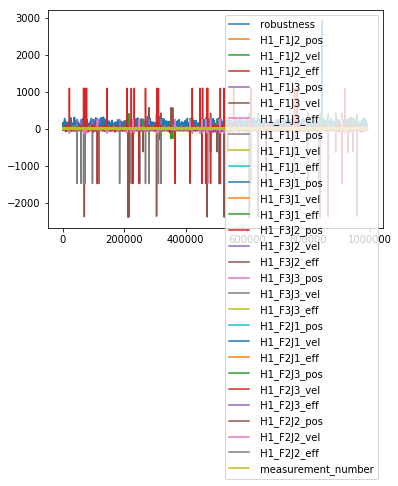

In [4]:
df.plot()

```
# Read the dataset
with open('dataset/shadow_robot_dataset.csv', 'r') as f:
    header = f.readline()
   
hdr = header.strip("\n").split(',')
hdr = [i.strip(" ") for i in header]

# only use velocity and effort 
saved_columns = []
for index, col in enumerate(hdr[1:]):
    if ("vel" in col) or ("eff" in col):
        saved_columns.append(index)
        
new_X = []
for x in dataset:
    new_X.append([x[i] for i in saved_columns])

# Preprocessed dataset that will be fed to the NN
X = numpy.array(new_X)
```

```
# Check the stability of the End effector
def check_stability(self, joint_names):
    current_min = 1000
    positions, velocities, efforts = [], [], []
    for k in range(30):
        sgs.move_tip(y=0.02)
        ball_distance = self.__compute_euclidean_distance()
        if k > min_lift_steps and ball_distance < current_min:
            current_min = ball_distance
            break
        if ball_distance > max_ball_distance:
            break
        time.sleep(0.5)
    reward = (1/(current_min - 0.18))**2
    return reward

```

## Implementation 
The process for which metrics, algorithms and techniques were implemented with the given dataset or input data has been thoroughtly documented. Complications that ocurred during the coding preocess are discussed.



# Keras & Sklearn

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import TensorBoard
from keras.layers import *
import numpy
from sklearn.model_selection import train_test_split

# Ignore the first row and column
dataset = numpy.loadtxt("dataset/shadow_robot_dataset.csv", 
                        skiprows = 1, usecols = range(1, 30), delimiter = ",")

Using TensorFlow backend.


Since my output vector expected is the grasp robustness. I will read the header of my CSV file and then collect and store those values into a list.
The list will get converted to numpy array which will serve for the output vector containing the predicted grasp robustness.

In [2]:
# csv_file = 'dataset/shadow_robot_dataset.csv'
# df = pd.read_csv(csv_file)

# Getting the header

with open('dataset/shadow_robot_dataset.csv', 'r') as f:
    header = f.readline()
# remove whitespace characters    
header = header.strip("\n").split(',')
header
header = [i.strip(" ") for i in header]

# use velocity and effort
saved_cols = []
for index, col in enumerate(header[1:]):
    if ("vel" in col) or ("eff" in col):
        saved_cols.append(index)
        
new_X = []
for x in dataset:
    new_X.append([x[i] for i in saved_cols])
   
# X - split of the dataset
X = numpy.array(new_X)

In [3]:
import pandas as pd
csv_file = 'dataset/shadow_robot_dataset.csv'
df = pd.read_csv(csv_file)

In [4]:
# Now let's split the test and train set
Y = dataset [:, 0]

In [5]:
# Provide a random seed
rnd_seed = 6

# dataset split
X_test, X_train, Y_test, Y_train = train_test_split(X, Y,
                                                    test_size = 0.30, random_state = rnd_seed)

# Good grasp threshold for stability
good_grasp = 50

# Store good and best grasp results
itemindex = numpy.where(Y_test > 1.05 * good_grasp)
best_grasps = X_test[itemindex[0]]
itemindex = numpy.where(Y_test <= 0.95 * good_grasp)
bad_grasps = X_test[itemindex[0]]

# splitting the grasp quality for stable or unstable grasps
Y_train = numpy.array([int(i > good_grasp) for i in Y_train])
Y_train = numpy.reshape(Y_train, (Y_train.shape[0],))
Y_test = numpy.array([int(i > good_grasp) for i in Y_test])
Y_test = numpy.reshape(Y_test, (Y_test.shape[0],))

# Building the model


In [6]:
# building the model
model = Sequential()
model.add(Dense(20*len(X[0]), use_bias = True, 
                input_dim = len(X[0]), activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))
# Compiling the model
model.compile(loss = 'binary_crossentropy', 
              optimizer = 'adam', metrics = ['accuracy'])

# Training the model

In [24]:
model.fit(X_train, Y_train, validation_split = 0.20, epochs = 50,
          batch_size = 500000)

Train on 238234 samples, validate on 59559 samples
Epoch 1/50
238234/238234 [==============================] - 2s 10us/step - loss: 0.8887 - acc: 0.5071 - val_loss: 0.5260 - val_acc: 0.6148
Epoch 2/50
238234/238234 [==============================] - 0s 1us/step - loss: 0.7531 - acc: 0.4583 - val_loss: 0.4369 - val_acc: 0.6135
Epoch 3/50
238234/238234 [==============================] - 0s 1us/step - loss: 0.6271 - acc: 0.5157 - val_loss: 0.3850 - val_acc: 0.6398
Epoch 4/50
238234/238234 [==============================] - 0s 1us/step - loss: 0.5336 - acc: 0.5618 - val_loss: 0.3585 - val_acc: 0.6530
Epoch 5/50
238234/238234 [==============================] - 0s 1us/step - loss: 0.4704 - acc: 0.5933 - val_loss: 0.3470 - val_acc: 0.6526
Epoch 6/50
238234/238234 [==============================] - 0s 1us/step - loss: 0.4284 - acc: 0.6156 - val_loss: 0.3437 - val_acc: 0.6525
Epoch 7/50
238234/238234 [==============================] - 0s 1us/step - loss: 0.4024 - acc: 0.6692 - val_loss: 0.3447 

In [25]:
# I will save the trained model trained with Keral library for later use
import h5py
model.save("./keras_model.h5")

In [27]:
# evaluating the model
score = model.evaluate(X_test, Y_test)

print("%s : %.3f%%" % (model.metrics_names[1], score[1]*100))

694848/694848 [==============================] - 35s 50us/step
acc : 97.137%


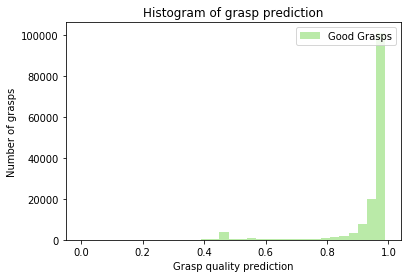

In [29]:
# plotting predictions 
predictions = model.predict(best_grasps)

%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(predictions,
         color='#77D653',
         alpha=0.5,
         label='Good Grasps',
         bins=np.arange(0.0, 1.0, 0.03))

plt.title('Histogram of grasp prediction')
plt.ylabel('Number of grasps')
plt.xlabel('Grasp quality prediction')
plt.legend(loc='upper right')

plt.show()

From the graph above it can bee seen that most of the grasps are correctly predicted as stable <0.8


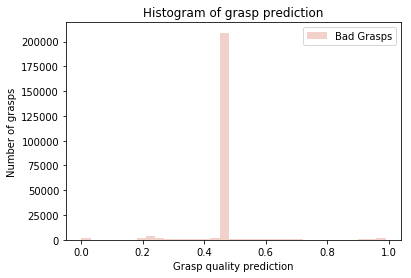

In [30]:
# Unstable grasps
predictions_bad_grasp = model.predict(bad_grasps)

# Plot a histogram of defender size
plt.hist(predictions_bad_grasp,
         color = '#D66751',
         alpha = 0.3,
         label = 'Bad Grasps',
         bins = np.arange(0.0, 1.0, 0.03))
plt.title('Histogram of grasp prediction')
plt.ylabel('Number of grasps')
plt.xlabel('Grasp quality prediction')
plt.legend(loc='upper right')
plt.show()

## Results
### Model Evaluation and validation

Please expand the description of you final model and the benchmark.?
The final model chosen was Reinforcement Learning. Its performance was benchmarked against lightGBM which showed a lower accuracy towards predicting the grasp quality of the end effector. The accuracy yielded after implementing them accordingly was as follows.

* lightGBM ~ 0.87 %
* Reinforcement Learning ~ 0.97 %

When evaluating the models I considered the robustness of the model as well. By definition robustness of a model becomes apparent when the models' output dependent variable (label) is consistently accurate regardless of the changes occuring from the input variables. Knowing the biases of machine learning models I am aware that my model cannot be absolutely accurate thus, it may contain biasses, variance and irreducible errors. those error could be best illustrated by the graph expressing the error versus model complexity graph.

<img src = "https://miro.medium.com/max/488/0*Gi2QTnPkbh8-YNu4.jpg">

Therefore, based on the abovementions reasons I choose RL as the model yielding better performance to classifying the grasp quality from the robotic hand. 

### Justification

The final results compared to the benchmark results or threshold with some type of statistical analysis. Justification is made as to whether the final model and solution is significant enough to have adequately solved the problem.

To validate my models' robustness I used the Holdout cross validation method. In applying it I split the data into two sets, train and test. They should not have any of the same data points. The split ratio between the two was 85% for the training set and 15% for testing. Below is shown a simple illustration of the split percentage among train and test set. 

<img src = "https://miro.medium.com/max/448/1*lUTgVK-A4F1yMYuUEdWtVw.png">

After performing the cross validation, and testing the trained network using a black box model approach I got expected results. The black box approach ensures that I can get numerically the same classification results compared to the simulator. Hence, to run the validation test I take the values of a known good grasp from the simulation environment, and plug the numbers manually through this black box function. The latter sends these values to the model and yields the prediction percentage. An example of the source code of the validation method is shown below:

```
sgs = SmartGrasper()
grasp_quality = GraspQuality(sgs)

bbt = blackBoxTest(grasp_quality.run_experiments,
                          {"grasp_distance": (-0.165, -0.16),
                           "H1_F1J1": (-0.2, 0.2),
                           "H1_F1J2": (0.0, 0.5),
                           "H1_F1J3": (0.2, 0.6),
                           "H1_F2J1": (-0.2, 0.2),
                           "H1_F2J2": (0.0, 0.5),
                           "H1_F2J3": (0.2, 0.6),
                           "H1_F3J1": (-0.2, 0.2),
                           "H1_F3J2": (0.0, 0.5),
                           "H1_F3J3": (0.2, 0.6)
                          })

best_grasp = bbt.res['max']['max_params']
grasp_quality.experiment(best_grasp["grasp_distance"],
                         best_grasp["H1_F1J1"], best_grasp["H1_F1J2"], best_grasp["H1_F1J3"],
                         best_grasp["H1_F2J1"], best_grasp["H1_F2J2"], best_grasp["H1_F2J3"],
                         best_grasp["H1_F3J1"], best_grasp["H1_F3J2"], best_grasp["H1_F3J3"],
                        )
                        
```
To achieve the results I had to run for a clear distinction between a good grasp vs bad I had to set the stability threshold at minimum 50. Once it was set then the prediction accuracy obtained for the model yielded good prediction that was 97% of the time in alighnment with the virtual simulation.

### References
```
[1] Carlos Rubert, Daniel Kappler, Jeannette Bohg and Antonio Morales:
Grasp success prediction with quality metrics 
[2] Jialiang (Alan) Zhao, Jacky Liang, and Oliver Kroemer:
Towards Precise Robotic Grasping by Probabilistic Post-grasp Displacement Estimation
[3] Alex Keith Goins: thesis work
[4] https://www.kaggle.com/ugocupcic/grasp-quality-prediction/
[5] Shadow robot – Building a sandbox for hand-robot training
[6] Google developers – Common ML problems
[7] Model validation framework: shorturl.at/dgmzR
[8] https://towardsdatascience.com/why-and-how-to-do-cross-validation-for-machine-learning-d5bd7e60c189
```